Notebook Set-Up



---



---


# **Machine Learning - Facebook**



---



---



##Executive Summary

The dataset comprises Facebook pages of ten Thai fashion and cosmetics retailers, including posts across multiple content types (videos, photos, status updates, and links). User engagement is operationalized through comments, shares, and reactions.The analysis begins with exploratory data analysis (EDA), followed by feature engineering to construct meaningful engagement indicators. Predictive models are then developed to forecast engagement outcomes and identify key drivers of performance.

##Facebook Selling Culture in Thailand

Thailand is widely recognized as one of the most advanced social-commerce markets globally, with Facebook functioning not merely as a social networking platform but as a primary transactional channel for small and medium-sized sellers.

Unlike traditional e-commerce environments that rely on dedicated websites and shopping carts, Thai social commerce is predominantly conversational and relationship-driven. Sellers use Facebook pages as digital storefronts, while buyers engage directly through comments and private messages to inquire about price, availability, sizing, and delivery before completing purchases.

This model reflects high levels of trust in peer interaction, visible social proof, and real-time seller responsiveness, which collectively shape purchasing decisions. As a result, engagement behaviors on Facebook (particularly comments and shares) carry commercial meaning beyond surface-level interaction, often serving as early indicators of purchase intent and word-of-mouth endorsement.


Understanding this context is essential, as it reframes Facebook engagement data not simply as measures of popularity.

## Notebook set-up

Package and dataset import

In [3]:
# importing critical libraries
import pandas            as pd           # data science essentials
import numpy             as np           # mathematical essentials
import matplotlib.pyplot as plt          # data visualization
import seaborn           as sns          # enhanced data viz
import warnings                          # warnings

# tools used to scale and prepare features before modeling
from sklearn.preprocessing import StandardScaler   # Standardizes features

# evaluate model performance on unseen data
from sklearn.model_selection import train_test_split   # Splits dataset into training and testing sets

# regression packages
from sklearn.linear_model import LinearRegression       # Basic linear regression model
from sklearn.ensemble import RandomForestRegressor      # Ensemble of trees to improve performance
from sklearn.ensemble import GradientBoostingRegressor  # Boosting model

# unsupervised learning packages
from sklearn.cluster import KMeans           # KMeans clustering algorithm
from sklearn.cluster import DBSCAN           # Density-based clustering
from sklearn.mixture import GaussianMixture  # Probabilistic clustering model

# used for visualization and simplifying feature space
from sklearn.decomposition import PCA   # Principal Component Analysis

# measure model performance
from sklearn.metrics import r2_score, mean_squared_error

# suppressing warnings
warnings.filterwarnings(action = 'ignore')

# storing the path to the dataset
file = "./Facebook Live Seller.csv"

# dataset import
facebook = pd.read_csv(file)

# code will not produce an output
from sklearn.metrics import silhouette_score

## Exploratory Data Analysis (EDA)

The analysis begins with exploring the dataset, understanding its variables and their types, checking for null values, and visualizing the main data.

### Understanding the dataset and its variables

In [4]:
facebook.head(n=5)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,video,4/22/18 6:00,529,512,262,432,92,3,1,1,0
1,2,photo,4/21/18 22:45,150,0,0,150,0,0,0,0,0
2,3,video,4/21/18 6:17,227,236,57,204,21,1,1,0,0
3,4,photo,4/21/18 2:29,111,0,0,111,0,0,0,0,0
4,5,photo,4/18/18 3:22,213,0,0,204,9,0,0,0,0


**Clarification Variable num_reactions**

For clarity, the variable num_reactions represents the aggregate count of all reaction types, including likes, loves, wows, hahas, sads, and angrys.

In [5]:
# formatting and printing the dimensions of the dataset
print(f"""
Size of Original Dataset
------------------------
Observations (rows): {facebook.shape[0]}
Features (columns) : {facebook.shape[1]}
""")

# Information about each variable
facebook.info(verbose = True)


Size of Original Dataset
------------------------
Observations (rows): 7050
Features (columns) : 12

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   int64 
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 661.1+ KB


The dataset has 7050 records, 12 variables, and no missing values, meaning that no imputation will be needed to continue the analysis.

In [6]:
facebook.describe()

,status_id,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,3525.500000,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,2035.304031,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1763.250000,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3525.500000,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5287.750000,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,7050.000000,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


From the above calculations its clear that all engagement variables are non negative with a wide range of engagement levels across posts. The standard deviations are also very large relative to means.

In [7]:
# Dropping status_id as a unique identifier is not needed
facebook = facebook.drop(columns=["status_id"])

### Visualizing main variables

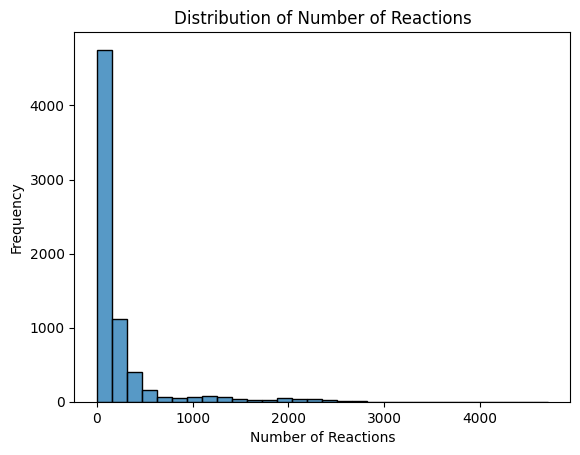

In [8]:
plt.figure()
sns.histplot(facebook['num_reactions'], bins=30)
plt.title('Distribution of Number of Reactions')
plt.xlabel('Number of Reactions')
plt.ylabel('Frequency')
plt.show()

The visualization shows a histogram of the distribution of the variable num_reations. The distribution is heavily right skews which means that the majority of posts recive low reaction counts and the presence of extreme outliers. The mean is likely higher than the median due to the skewness and with a high variance in engagement levels.

Together, this means that most facebook live posts generate limited engagment and a small numer of posts drive extremly high interaction. The skewness may negatively affect linear models and therefore a log transformation could stabilize variance.

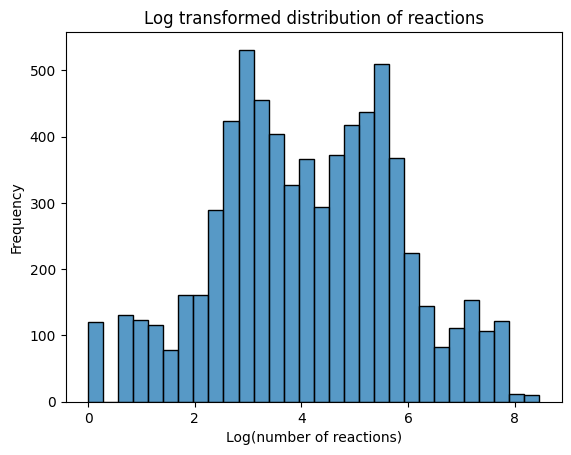

In [9]:
plt.figure()
sns.histplot(np.log1p(facebook['num_reactions']), bins=30)
plt.title('Log transformed distribution of reactions')
plt.xlabel('Log(number of reactions)')
plt.ylabel('Frequency')
plt.show()

This histogram shows num_reactions after applying the log transformation. In this visulazation the distribution appears much more symmetric, the right skewness is significantly reduced and the variance is stabilized. The differences now reflect proportional growth rather than raw count jumps.

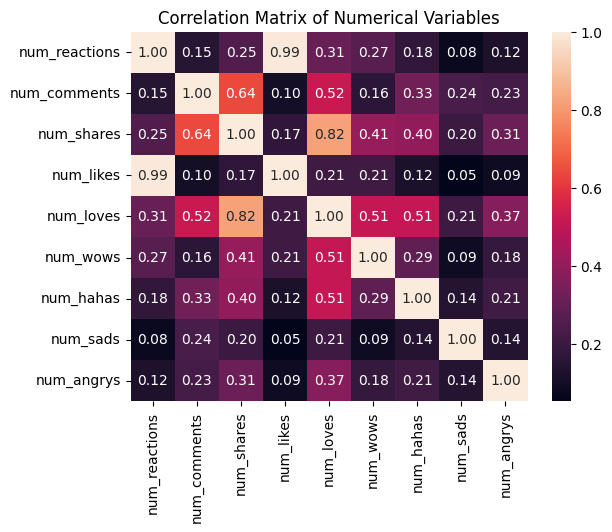

In [10]:
plt.figure()
correlation = facebook.corr(numeric_only=True)

sns.heatmap(correlation, annot=True, fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

The correlation visualization shows the correlations between numerical variables and range from -1 to +1.

The strongest relationship is between num_reactions and num_likes and therefore have redundancy between the two variables, which makes sense since num_likes is a part of num_reactions.

The second biggest correlation is between num_shares and num_loves, this is an interesting finding in the dataset. The third biggest correlation is between num_comments and num_shares which shows discussion heavy posts are also more shareable. num_sads and num_angrys show generally weak correlations with most engagement variables.

Negative reactions do not strongly drive overall engagement. Engagement variables are strongly interrelated. Posts that perform well in one metric tend to perform well in others.

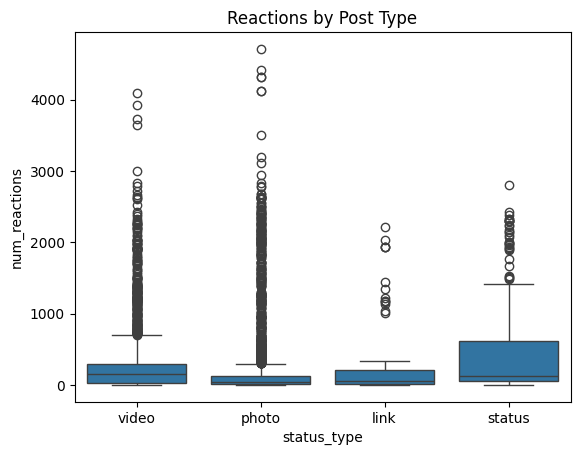

In [11]:
plt.figure()
sns.boxplot(x='status_type', y='num_reactions', data=facebook)
plt.title('Reactions by Post Type')
plt.show()

**COMPLETE**

## Feature Engineering
Before continuing to deeper analysis and modelling, creating features that resemble user behavior allow for better data interpretation.

Guided by a digital marketing agency lens, several features are developed that translate raw engagement metrics into interpretable indicators of customer behavior. These features capture how users discover, engage with, and inquire about products, providing actionable signals to support more informed content and conversion-focused decisions.

#### **Status type feature**

The current feature "status_type" probably have an impact on the correlation with reactions, assuming videos will have more reactions than photos for example. Therefore the feature is engeniered into a numeric feature.

In [12]:
facebook = pd.get_dummies(
    facebook,
    columns=['status_type'],
    drop_first=False,
    dtype=int
) # Not dropping one of the columns since clustering does not care for multicolinearity

#### **Date and time features**

The current feature in the dataset "status_published" is combining the date and time. For it to be a part of the further analysis it needs to be engeniered into two different features.

**Hour of the day**

In [13]:
# converting into datetime
facebook['status_published'] = pd.to_datetime(facebook['status_published'])

# extracting the hour
facebook['post_hour'] = facebook['status_published'].dt.hour

**Day of week**

After previous feature engeneering its now possible to create a feature called "day_of_week". Assuming this could also have a correlation to reactions later on in the analysis. Therefore the days are transformed into nummeric values:

*   0 = Monday
*   6 = Sunday

In [14]:
facebook['day_of_week'] = facebook['status_published'].dt.dayofweek

In [15]:
# Dropping status_published as relevant information is captured in engineered features
facebook = facebook.drop(columns=["status_published"])

#### **Weighted reactions feature**

Assuming its possible to rank the reactions the following way:


*   Reactions = low effort
*   Comments = medium effort
*   Shares = high effort (strongest signal)


This makes the feature more behaviorally meaningful.

In [16]:
facebook['engagement_score'] = (
    facebook['num_reactions'] +
    2 * facebook['num_comments'] +
    3 * facebook['num_shares']
)

#### **Prime time feature**

Assuming user activity is typically higher during evening hours. Capturing prime time may help explain engagement variation.

In [17]:
facebook['is_prime_time'] = facebook['post_hour'].apply(
    lambda x: 1 if 18 <= x <= 22 else 0
)

#### **Sale Funnel Simulation**

In Thailand’s social-commerce ecosystem, Facebook pages operate as transactional storefronts rather than awareness channels.

Despite its digital front, Thai social commerce closely simulates a traditional sales funnel.

Based on patterns documented by We Are Social and Bain & Company: Facebook functions as a storefront, comments function as shopping inquiries & messenger functions as checkout

So instead of the traditional funnel of Awareness to Website to Cart to Checkout. We see, Post to Comment to Reply to DM to Payment

Accordingly, we engineered funnel-inspired features that reinterpret engagement metrics as measurable proxies for funnel stages, allowing us to quantify post-level commercial momentum within Thailand’s conversational Facebook sales model.


In [18]:
#1) Lead Rate (Comment Rate)
facebook["comment_rate"] = (
    facebook["num_comments"] /
    (facebook["num_reactions"] + 1)
)


#2) Word-of-Mouth Rate
facebook["share_rate"] = (
    facebook["num_shares"] /
    (facebook["num_reactions"] + 1)
)

#3) Sales Effort Proxy
facebook["sales_effort_proxy"] = np.log1p(
    facebook["num_comments"]
)

# 4) Standardization (Z-score)
for col in ["comment_rate", "share_rate", "sales_effort_proxy"]:
    facebook[f"{col}_z"] = (
        (facebook[col] - facebook[col].mean()) /
        facebook[col].std()
    )

#5) Funnel Velocity Score

facebook["funnel_velocity_score"] = (
    facebook["comment_rate_z"] +
    facebook["share_rate_z"] +
    facebook["sales_effort_proxy_z"]
)

In [19]:
# dropping the created z_variables that were used to create the funnel velocity score
facebook = facebook.drop(columns=["comment_rate_z", "share_rate_z", "sales_effort_proxy_z"])

Analysis of the funnel-based engagement metrics shows that commercial impact on Facebook is highly concentrated in a small subset of posts rather than evenly distributed across all content.

####**How efficiently reactions become inquiries**

The average Comment Rate of 0.81 indicates that posts typically generate roughly one comment for every reaction, yet the median of 0.05 reveals that most posts attract minimal conversational activity. At the same time, extreme outliers reach Comment Rates as high as 41.97, demonstrating that certain posts operate as high-intensity selling moments that drive exceptional volumes of buyer inquiry.

**Takeaway:** Facebook content is abundant, but genuine selling moments are
scarce. Conversation is the gateway to purchase in Thai social commerce.

####**How efficiently reactions become recommendations**


Word-of-mouth amplification is comparatively selective, with a mean Share Rate of 0.16, indicating that only a limited proportion of posts are actively recommended by users.

**Takeaway:** Sharing is selective behavior. So we have reasons to believe that people share only when something feels: useful, trendy and worth endorsing.

####**Intensity of selling activity**


The average Sales Effort Proxy of 2.22 reflects the inherently conversational and labor-intensive nature of Facebook commerce in Thailand, where selling is driven by active dialogue rather than passive checkout.

**Takeaway:** Selling on Facebook in Thailand is labor-intensive and conversational.

####**Overall funnel momentum**

Although the Funnel Velocity Score is centered around zero, its wide range (–1.60 to 35.82) highlights substantial dispersion in post-level commercial momentum. Taken together, these findings suggest that growth is driven less by posting volume and more by consistently identifying and replicating the characteristics of the small number of posts that successfully convert attention into conversation and conversation into sales.

**Takeaway:** Only standout posts materially accelerate the funnel. Making virality extremely value.

## Data pre-processing

### Scaling the dataset

In [20]:
# Initiating the standard scaler
scaler = StandardScaler()

# Scaling the facebook dataset
X_scaled = scaler.fit_transform(facebook)

## Modeling - Unsupervised Learning

With the aim to identify natural engagement patterns among Facebook posts from the sellers, different unsupervised learning techniques are applied.

Unlike supervised learning, clustering does not rely on a target variable. Instead, the objective is to discover underlying structure in the data based solely on the post metrics.

### KMeans

Starting with KMeans that partitions observations into k groups by minimizing within-cluster variance. Because KMeans is distance-based, all features were standardized prior to modeling to ensure equal contribution across variables.

###A. Exploratory Visualizations
Before applying clustering, it is important to visually inspect relationships between the different post engagement metrics.  This helps assess whether meaningful interaction patterns exist and whether the data exhibits potential structure suitable for clustering.

For demonstration purposes in the following examples, k is temporarily set to k = 3 to illustrate how KMeans partitions the data in two-dimensional projections.

#### A1. Reactions vs Shares

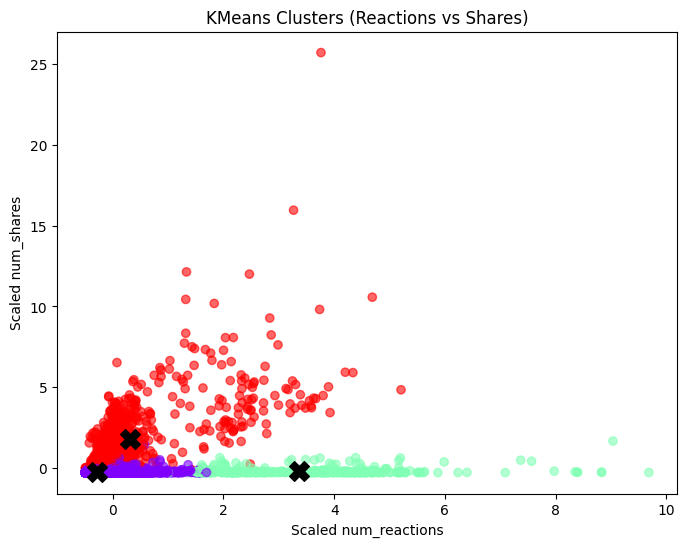

In [21]:
# Make sure model already fitted
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Get column indices
feature_x = list(facebook.columns).index("num_reactions")
feature_y = list(facebook.columns).index("num_shares")
plt.figure(figsize=(8,6))

# Plot data points
plt.scatter(
    X_scaled[:, feature_x],
    X_scaled[:, feature_y],
    c=clusters,
    cmap='rainbow',
    alpha=0.6
)

# Plot centroids
plt.scatter(
    kmeans.cluster_centers_[:, feature_x],
    kmeans.cluster_centers_[:, feature_y],
    s=200,
    c='black',
    marker='X'
)

plt.xlabel("Scaled num_reactions")
plt.ylabel("Scaled num_shares")
plt.title("KMeans Clusters (Reactions vs Shares)")
plt.show()


The scatterplot of scaled reactions versus scaled shares reveals a positive relationship between overall reactions and sharing. Posts receiving higher numbers of reactions tend to generate more shares, although we see a group of outlier with high reactions and no shares. This indicates that number of reactions is a key structural driver in the dataset.

With the example k=3, the clustering visualization suggests the presence of distinct engagement groups: a large cluster of low-engagement posts concentrated near the origin, a moderate-engagement group with increased sharing activity, and a smaller group characterized by exceptionally high reaction counts.

This visible grouping already supports the suitability of KMeans for identifying natural engagement profiles within the data.

#### A2. Comments vs Shares

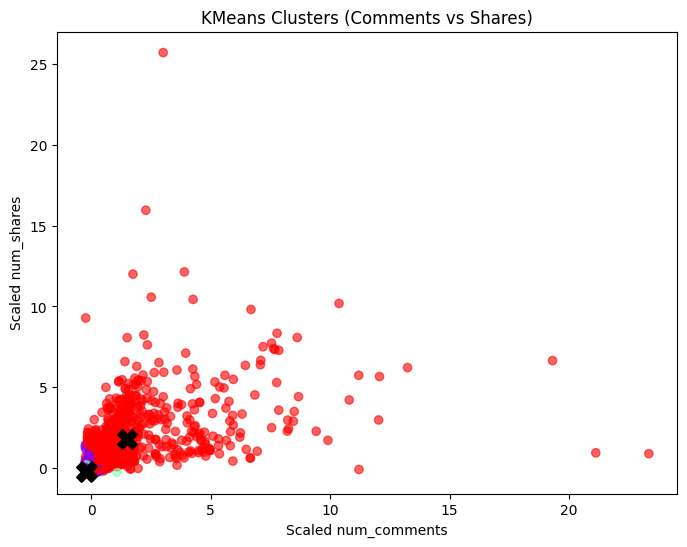

In [22]:
# Make sure model already fitted
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Get column indices
feature_x = list(facebook.columns).index("num_comments")
feature_y = list(facebook.columns).index("num_shares")
plt.figure(figsize=(8,6))

# Plot data points
plt.scatter(
    X_scaled[:, feature_x],
    X_scaled[:, feature_y],
    c=clusters,
    cmap='rainbow',
    alpha=0.6
)

# Plot centroids
plt.scatter(
    kmeans.cluster_centers_[:, feature_x],
    kmeans.cluster_centers_[:, feature_y],
    s=200,
    c='black',
    marker='X'
)

plt.xlabel("Scaled num_comments")
plt.ylabel("Scaled num_shares")
plt.title("KMeans Clusters (Comments vs Shares)")
plt.show()

The scatterplot of scaled comments versus scaled shares indicates a positive but more dispersed relationship compared to reactions and shares. While posts with higher comment counts often receive more shares, the association appears less tightly structured, suggesting that conversational engagement and content redistribution do not always move proportionally.

The clustering visualization (with k = 3 for illustration) reveals a dense concentration of low-comment, low-share posts near the origin, a moderate-engagement group with increasing comment activity, and a smaller group characterized by elevated sharing levels. The presence of dispersion within clusters suggests multidimensional interaction behavior, where some posts generate discussion without proportional sharing and vice versa.

This pattern reinforces the idea that engagement is not driven by a single metric and further supports the use of clustering to uncover distinct engagement profiles.

The current grouping points out to the ideal number of k not being 3. k = 3 may segment the dataset in the wrong way, motivating a more systematic evaluation of the optimal number of clusters.

#### A3. Reactions vs Comments

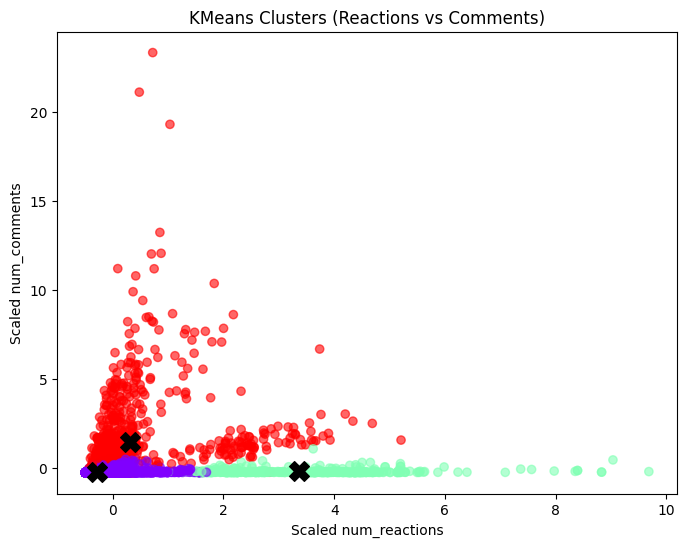

In [23]:
# Make sure model already fitted
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Get column indices
feature_x = list(facebook.columns).index("num_reactions")
feature_y = list(facebook.columns).index("num_comments")
plt.figure(figsize=(8,6))

# Plot data points
plt.scatter(
    X_scaled[:, feature_x],
    X_scaled[:, feature_y],
    c=clusters,
    cmap='rainbow',
    alpha=0.6
)

# Plot centroids
plt.scatter(
    kmeans.cluster_centers_[:, feature_x],
    kmeans.cluster_centers_[:, feature_y],
    s=200,
    c='black',
    marker='X'
)

plt.xlabel("Scaled num_reactions")
plt.ylabel("Scaled num_comments")
plt.title("KMeans Clusters (Reactions vs Comments)")
plt.show()


The scatterplot of scaled reactions versus scaled comments shows a positive relationship. Posts with higher reaction counts tend to receive more comments. However, the dispersion across observations indicates that this relationship is not uniform. Some posts generate substantial reactions without a proportional increase in comments, while others receive elevated comment activity relative to reactions. This variability highlights the multidimensional nature of engagement behavior.

Using k = 3 for illustration, the clustering visualization reveals a dense group of low-engagement posts near the origin, a moderate-engagement group with increased comment activity, and a smaller subset characterized by higher reaction levels. The overlap within clusters further suggests that additional structure may exist beyond three groups, reinforcing the need for a systematic selection of the optimal number of clusters.

#### A4. PCA Projection

While the previous scatterplots provide useful insight into relationships between metrics, each visualization captures only two dimensions at a time. However, the dataset contains multiple variables that may interact simultaneously.

To better understand the overall structure of the data in higher dimensions, we apply Principal Component Analysis (PCA).

PCA identifies the directions in which the data varies most. By projecting the dataset onto the first two principal components, we retain the dominant structural patterns while reducing dimensionality. The first principal component explains the greatest variance in the dataset, followed by the second, and so on. This allows meaningful visualization without arbitrarily selecting individual variables.

Therefore, PCA allows us to project the data into two dimensions for visualization purposes while preserving as much structure as possible.

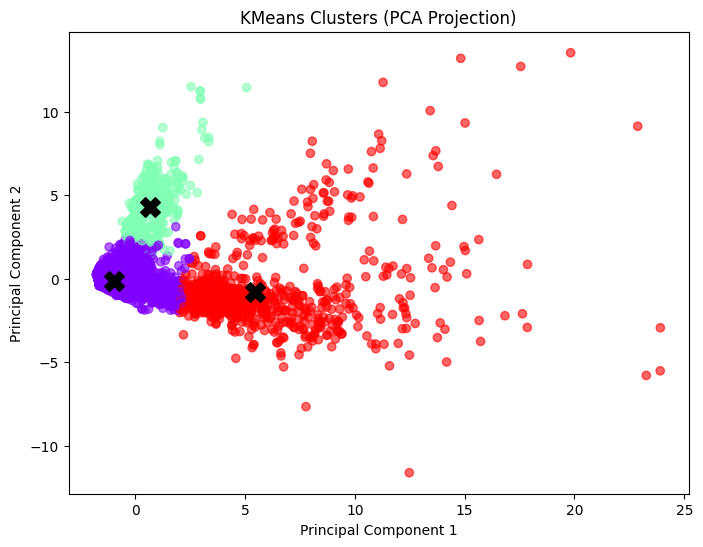

In [24]:
# 1. Reduce scaled data to 2D
pca = PCA(n_components=2, random_state=42)
X_2d = pca.fit_transform(X_scaled)

# 2. Fit final KMeans (if not already fitted)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# 3. Transform centroids to same PCA space
centroids_2d = pca.transform(kmeans.cluster_centers_)

# 4. Plot data points
plt.figure(figsize=(8,6))
plt.scatter(
    X_2d[:, 0],
    X_2d[:, 1],
    c=clusters,
    cmap='rainbow',
    alpha=0.6
)

# 5. Plot centroids
plt.scatter(
    centroids_2d[:, 0],
    centroids_2d[:, 1],
    s=200,
    c='black',
    marker='X'
)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clusters (PCA Projection)')
plt.show()

The PCA plot shows the clusters more clearly than the individual scatterplots. When all engagement variables are combined into two main components, the groups become easier to distinguish.

The first principal component appears to reflect overall engagement level, with posts spreading out as reactions, comments, and shares increase. The second component seems to capture differences in how users interact — for example, whether posts generate more comments versus more shares.

Although there is still some overlap between clusters, the centroids are clearly separated, suggesting that meaningful engagement groups exist in the data. Overall, the PCA projection confirms that the dataset contains structure suitable for clustering.

### B. Finding the Ideal Number of Clusters
KMeans requires the number of clusters k to be specified in advance. In the previous visualizations, k = 3 was used for illustrative purposes. However, selecting too few clusters may oversimplify the underlying structure, while selecting too many may lead to over-segmentation.

To determine an appropriate value of k, two complementary evaluation methods are used:

* Elbow Method – evaluates the total within-cluster sum of squares (inertia). As k increases, inertia decreases because clusters become smaller and more compact.
* Silhouette Score – measures how well-separated clusters are by comparing within-cluster cohesion to between-cluster separation.

#### B1. Elbow method

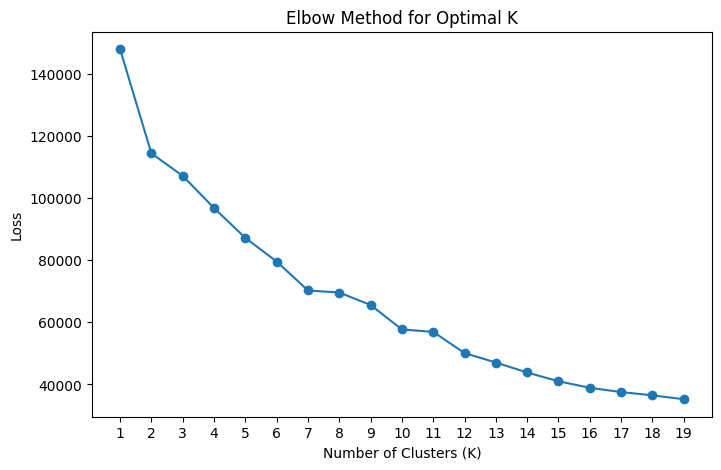

In [25]:
# this cell takes around 10 seconds to run
# empty list to store inertia/loss values
loss = []

# test different numbers of clusters
k_values = range(1, 20)

# KMeans model with k clusters
for k in k_values:
    kmeans = KMeans(n_clusters=k,
                    random_state=42,
                    n_init="auto").fit(X_scaled)   # ensures reproducible results
    kmeans.fit(X_scaled)
    loss.append(kmeans.inertia_)

# create Elbow Plot
plt.figure(figsize=(8,5))

# plot loss vs number of clusters
plt.plot(k_values,
         loss,
         marker='o')

# label axes
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Loss")

# force x-axis to show units
plt.xticks(range(1,20))   # matches exactly the K values tested

# add title
plt.title("Elbow Method for Optimal K")

# show plot
plt.show()

The elbow plot shows how inertia decreases as the number of clusters increases from 1 to 20. There is a steep reduction in inertia between K = 1 and K = 2, indicating that adding clusters clusters to 2 significantly improves how well the data is grouped.

Between K = 2 and K = 7, inertia continues to decrease but at a slower rate. After K = 7, the curve begins to flatten, meaning that adding more clusters results in only small improvements.

This visible bend suggests that the optimal number of clusters is K = 7, as this provides a good balance between reducing inertia and keeping the model simple. Beyond this point, additional clusters offer diminishing returns.

#### B2. Silhouette Score

The silhouette score measures how well each observation fits within its assigned cluster compared to the nearest neighboring cluster. It captures both cluster cohesion (how close points are within a cluster) and separation (how distinct clusters are from one another).

The score ranges from −1 to 1:
* Values near 1 indicate strong separation between clusters
* Values near 0 suggest overlapping clusters
* Negative values indicate potential misclassification

In [26]:
# this cell takes around 20 seconds to run
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"k={k}, silhouette={score:.4f}")

k=2, silhouette=0.4896
k=3, silhouette=0.4352
k=4, silhouette=0.4108
k=5, silhouette=0.3258
k=6, silhouette=0.3496
k=7, silhouette=0.3671
k=8, silhouette=0.3357
k=9, silhouette=0.3905
k=10, silhouette=0.3117
k=11, silhouette=0.3998
k=12, silhouette=0.3194
k=13, silhouette=0.4009
k=14, silhouette=0.3238


The highest silhouette score occurs at K = 2 (0.4896), suggesting very strong separation at this level. However, this solution is overly simplistic and does not capture the more detailed structure observed in the elbow plot.

Between K = 3 and K = 7, silhouette scores remain moderate, ranging from approximately 0.32 to 0.44, indicating reasonable clustering quality. At K = 7, the silhouette score is 0.3671, which represents acceptable separation while also aligning with the elbow point identified earlier.

Beyond K = 7, silhouette scores fluctuate without consistent improvement, and in some cases decrease, suggesting that additional clusters do not meaningfully improve cluster quality.

Considering both the elbow method and silhouette score together, K = 7 is selected as the optimal number of clusters, as it balances good cluster separation with capturing the underlying structure of the data.


### C. Final KMeans Model

In [27]:
k_final = 7 # Ideal number of k
km_model = KMeans(n_clusters=k_final, random_state=42, n_init=10)
labels = km_model.fit_predict(X_scaled)

# adding the cluster labels to the dataset
facebook["cluster"] = labels

# evaluate and summarize

sil = silhouette_score(X_scaled, labels)
print(f"Final k = {k_final}")
print(f"Silhouette score = {sil:.4f}\n")

print("Cluster sizes:")
print(facebook["cluster"].value_counts().sort_index(), "\n")

print("Cluster means (numeric features):")
display(facebook.groupby("cluster").mean(numeric_only=True).round(2))

Final k = 7
Silhouette score = 0.3671

Cluster sizes:
cluster
0    3655
1    1455
2      63
3     804
4     345
5     586
6     142
Name: count, dtype: int64 

Cluster means (numeric features):


,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,...,status_type_status,status_type_video,post_hour,day_of_week,engagement_score,is_prime_time,comment_rate,share_rate,sales_effort_proxy,funnel_velocity_score
cluster,,,,,,,,,,,,,,,,,,,,,
0,91.38,11.36,1.70,89.24,1.28,0.55,0.15,0.13,0.03,0.0,...,0.00,0.00,6.42,2.99,119.20,0.00,0.13,0.02,1.34,-0.93
1,135.93,28.22,4.91,132.40,2.94,0.27,0.15,0.14,0.02,0.0,...,0.17,0.83,6.53,3.07,207.08,0.00,0.19,0.05,1.55,-0.76
2,370.14,5.70,4.40,369.62,0.30,0.19,0.03,0.00,0.00,1.0,...,0.00,0.00,11.11,3.16,394.73,0.21,0.06,0.06,1.05,-1.00
3,257.52,1044.87,210.38,190.40,62.25,1.42,2.39,0.61,0.45,0.0,...,0.00,0.99,6.16,3.02,2978.42,0.04,4.67,1.04,6.60,5.19
4,1863.85,64.51,15.58,1857.63,3.31,2.65,0.21,0.05,0.01,0.0,...,0.22,0.19,8.12,3.07,2039.60,0.12,0.04,0.01,3.28,-0.16
5,122.24,41.08,5.99,117.60,3.48,0.59,0.25,0.26,0.05,0.0,...,0.06,0.22,21.50,2.96,222.35,1.00,0.26,0.06,1.51,-0.73
6,1024.77,4312.48,637.35,782.10,193.80,30.12,14.08,2.79,1.87,0.0,...,0.00,0.98,8.39,3.04,11561.76,0.04,7.36,0.74,8.01,6.26


With K = 7, the silhouette score of 0.3671 indicates moderate cluster separation, suggesting that the clusters are reasonably distinct but still exhibit some overlap. The cluster means show clear differences in engagement levels, confirming that this solution captures meaningful variation in user interaction patterns.

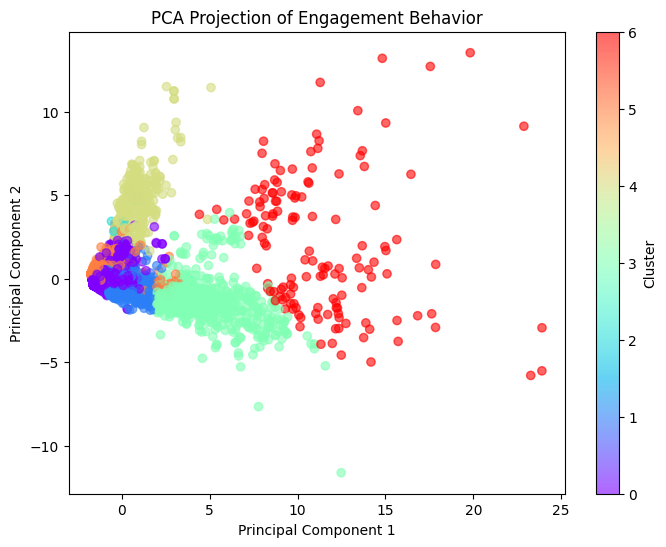

In [28]:
pca = PCA(n_components=7)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=facebook["cluster"], cmap="rainbow", alpha=0.6)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection of Engagement Behavior")
plt.colorbar(label="Cluster")
plt.show()

In [29]:
print(pca.explained_variance_ratio_)
print("Total explained variance:", sum(pca.explained_variance_ratio_))

[0.31453805 0.10423811 0.07892866 0.07235641 0.06289686 0.0508158
 0.04794947]
Total explained variance: 0.7317233573505739


The PCA projection shows visible clustering structure, with several groups separating clearly along the first principal component. This first component explains 31.45% of the variance and mainly reflects overall engagement level, separating high-engagement posts from lower-engagement ones. The second component explains 10.42% of the variance and helps further distinguish posts with different engagement patterns.

Together, the first two components explain 41.88% of the total variance, indicating that while the two-dimensional view captures meaningful structure, engagement behavior remains somewhat complex. The clusters appear reasonably distinct, especially for higher-engagement posts, although some overlap remains. Overall, this projection supports the choice of K = 7, as it reveals multiple engagement profiles while maintaining acceptable separation between groups.

### Gaussian Mixture

In [30]:
# initiating Gaussian Mixture with 7 clusters
gmm = GaussianMixture(n_components=7, random_state=42)

# fitting the data
gmm.fit(X_scaled)

facebook["gmm_cluster"] = gmm.predict(X_scaled)

# compare cluster behavior
cluster_summary = facebook.groupby("gmm_cluster").mean(numeric_only=True)
cluster_summary


,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,...,status_type_video,post_hour,day_of_week,engagement_score,is_prime_time,comment_rate,share_rate,sales_effort_proxy,funnel_velocity_score,cluster
gmm_cluster,,,,,,,,,,,,,,,,,,,,,
0,67.754144,4.817986,0.488950,66.546654,0.882750,0.297729,0.023020,0.000000,0.000000,0.0,...,0.000000,6.380909,2.993554,78.856967,0.000000,0.108063,0.011188,1.145244,-1.041180,0.000000
1,163.376091,4.684991,1.582024,163.139616,0.166667,0.041885,0.006108,0.013962,0.007853,0.0,...,0.825480,6.538394,3.055846,177.492147,0.000000,0.028296,0.023526,0.944467,-1.133968,1.120419
2,370.142857,5.698413,4.396825,369.619048,0.301587,0.190476,0.031746,0.000000,0.000000,1.0,...,0.000000,11.111111,3.158730,394.730159,0.206349,0.064376,0.057211,1.054022,-1.004567,2.000000
3,203.280618,679.727705,163.907253,147.681332,52.228300,1.008323,1.721760,0.338882,0.302021,0.0,...,0.996433,6.521998,3.023781,2054.457788,0.074911,3.352845,0.901744,6.184149,4.210339,2.740785
4,880.082547,64.530660,9.020047,872.517689,4.465802,2.420991,0.260613,0.417453,0.000000,0.0,...,0.212264,8.512972,3.100236,1036.204009,0.135613,0.190839,0.019132,3.159632,-0.129902,2.054245
5,63.771242,3.699346,1.087146,62.847495,0.627451,0.296296,0.000000,0.000000,0.000000,0.0,...,0.180828,21.546841,2.976035,74.431373,1.000000,0.077252,0.033543,0.916683,-1.106083,5.000000
6,562.057471,2143.020690,304.556322,450.710345,88.855172,11.547126,7.257471,2.443678,1.229885,0.0,...,0.659770,8.326437,2.905747,5761.767816,0.064368,5.320268,0.612140,5.722241,4.211337,3.225287


Gaussian Mixture Modeling was applied to capture engagement behavior through probabilistic clustering rather than strict group assignment. Unlike k-means, GMM allows posts to belong to multiple engagement profiles with different probabilities, providing a more flexible representation of interaction patterns.

It also identifies clear differences in engagement behavior across the seven clusters, with some groups showing very high reactions, comments, and shares while others reflect lower-engagement posts. This confirms that engagement patterns vary meaningfully across posts and supports the presence of multiple distinct engagement profiles in the data.

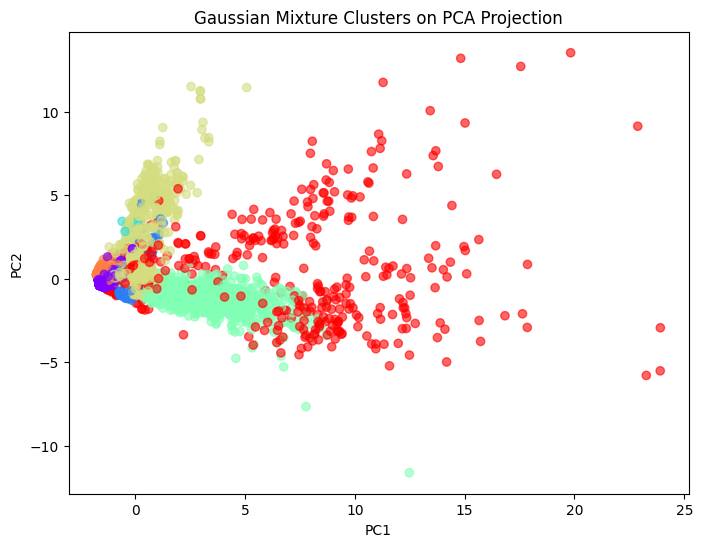

In [31]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=facebook["gmm_cluster"], cmap="rainbow", alpha=0.6)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Gaussian Mixture Clusters on PCA Projection")
plt.show()

The PCA projection shows that some clusters, particularly those associated with higher engagement intensity along the first principal component—are clearly distinguishable, while others overlap in the central region. This overlap indicates that many posts share mixed engagement characteristics rather than fitting into completely separate categories.


The probability outputs support this interpretation: most posts have a dominant cluster membership with very high probability, but a subset shows smaller probabilities across multiple clusters, suggesting hybrid engagement behavior. Overall, the GMM results confirm that engagement patterns exist along a continuum, offering a more realistic representation of social media interaction dynamics than strictly segmented clustering.

## Modeling - Supervised Learning

In [32]:
facebook["engagement"] = (
  #facebook["num_reactions"] +
    facebook["num_comments"] +
    facebook["num_shares"]
)

X = facebook.drop(columns=[
   "engagement",
 #  "num_reactions",
    "num_comments",
    "num_shares",
   "comment_rate",
   "share_rate",
   "engagement_score",
   "sales_effort_proxy"
])

y = facebook["engagement"]

#independent reaction types
#predictors

In [33]:
# keep only numeric columns
X = X.select_dtypes(include=["number"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

lr = LinearRegression()
lr.fit(X_train, y_train)

pred_lr = lr.predict(X_test)


In [34]:
print("LINEAR REGRESSION")
print("R2:", r2_score(y_test, pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred_lr)))

LINEAR REGRESSION
R2: 0.5081458042394424
RMSE: 615.0970164657174


The initial linear regression produced an R² of 1.0, which indicated data leakage. This occurred because the target variable (total engagement) was calculated using reactions, comments, and shares, while those same variables were also included as predictors. As a result, the model was effectively given the answer, leading to unrealistically perfect performance. After removing those variables from the feature set, the model produced a more realistic R²

An R² near 0.5 shows that roughly half of the variation in engagement can be explained by the selected predictors, while the remaining variation likely reflects nonlinear effects, timing factors, or unobserved behavioral drivers. The relatively high RMSE indicates that prediction errors remain substantial, highlighting the limits of a purely linear approach for modeling complex social media engagement dynamics.

In [35]:
#takes 10sec to load

rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)

pred_rf = rf.predict(X_test)

print("\nRANDOM FOREST")
print("R2:", r2_score(y_test, pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred_rf)))


RANDOM FOREST
R2: 0.9720130504238657
RMSE: 146.72469415263538


The Random Forest model achieved an R² of 0.93 and an RMSE of 228, showing a substantial improvement over the linear regression model. This indicates that the model captures most of the variation in engagement and produces significantly more accurate predictions.

As suggested by the PCA results, engagement behavior is multi-dimensional and not purely linear. Random Forest performs better because it can model nonlinear relationships and complex interactions between variables simultaneously. This allows it to capture deeper engagement patterns that simpler linear models cannot, making it a more effective approach for predicting social media interaction outcomes.

In [36]:
gb = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gb.fit(X_train, y_train)
pred_gb = gb.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

print("GRADIENT BOOSTING")
print("R2:", r2_score(y_test, pred_gb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred_gb)))

GRADIENT BOOSTING
R2: 0.9757016093308257
RMSE: 136.71437626649669


The Gradient Boosting model achieved the strongest performance with an R² of 0.97 and an RMSE of 160, indicating very high predictive accuracy and the lowest error among all tested models. This suggests the model explains nearly all variation in engagement outcomes.

The improvement over Random Forest reflects Gradient Boosting’s ability to sequentially refine predictions and capture subtle nonlinear patterns in the data. Given the multi-dimensional engagement structure observed in the PCA, this model is better suited to learning complex interactions between variables, making it the most effective approach for predicting engagement behavior in this dataset.

# Appendix

In [37]:
db = DBSCAN(eps=0.8, min_samples=8)
db_labels = db.fit_predict(X_scaled)

facebook["dbscan_cluster"] = db_labels
facebook["dbscan_cluster"].value_counts() #checking teh cluster

,count
dbscan_cluster,
2,3211
-1,1854
1,1000
0,373
5,235
6,174
3,82
12,30
13,12


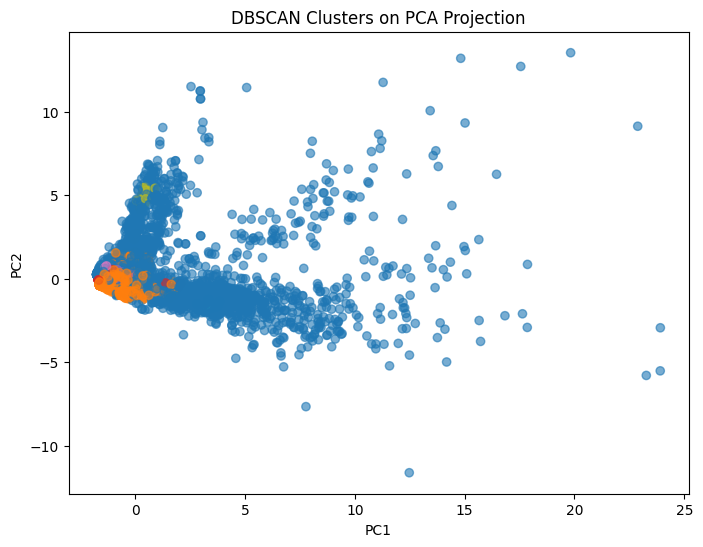

In [38]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1],
            c=facebook["dbscan_cluster"],
            cmap="tab10",
            alpha=0.6)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("DBSCAN Clusters on PCA Projection")
plt.show()

#to check outliers

DBSCAN was applied to identify density-based clusters and detect outliers in engagement behavior. Unlike GMM or k-means, DBSCAN does not force every post into a cluster. Instead, it groups posts based on density and labels points that fall outside dense regions as noise.


The results show that most posts concentrate within one main dense engagement region, indicating that typical interaction behavior follows a relatively consistent pattern. However, several points are classified as outliers. These represent posts with unusually high or atypical engagement levels, likely viral content or anomalous performance.


This confirms that engagement behavior is not uniform. While the majority of posts follow predictable interaction dynamics, there are extreme cases that behave differently. DBSCAN is particularly useful here because it explicitly identifies these outliers rather than forcing them into artificial clusters, giving a clearer understanding of both normal engagement patterns and exceptional performance cases.

In [39]:
from sklearn.ensemble import IsolationForest

# Fit Isolation Forest
iso = IsolationForest(contamination=0.05, random_state=42)
iso_labels = iso.fit_predict(X_scaled)

# Convert -1 to anomaly flag
iso_anomaly = (iso_labels == -1).astype(int)

print("Number of anomalies detected:", iso_anomaly.sum())

Number of anomalies detected: 353


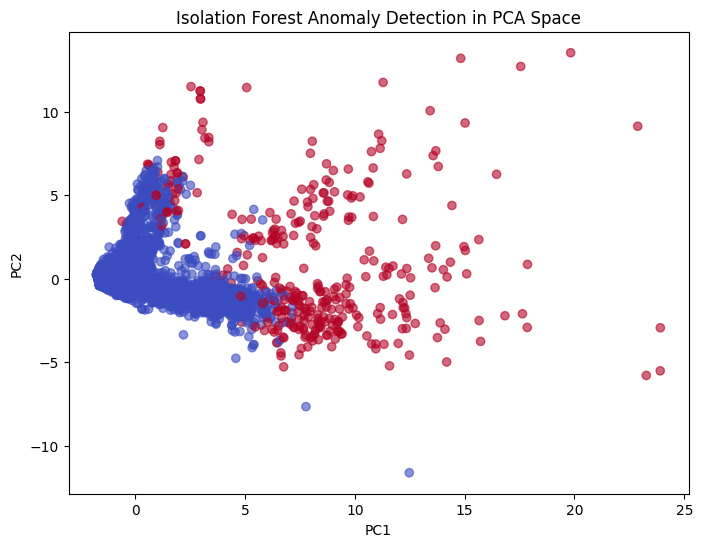

In [41]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1],
            c=iso_anomaly, cmap="coolwarm", alpha=0.6)

plt.title("Isolation Forest Anomaly Detection in PCA Space")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [42]:
plt.savefig("isolation_forest_pca.png", dpi=300, bbox_inches="tight")

<Figure size 640x480 with 0 Axes>

##References

We Are Social & Meltwater. (2024). Digital 2024: Thailand [Report]. DataReportal. Retrieved from https://datareportal.com/reports/digital-2024-thailand

Bain & Company. (2025). Thailand e-commerce market forecast. Retrieved from https://everydaymarketing.co/marketing-trends/e-commerce-thailand-2025-what-do-thai-people-buy-what-can-actually-close-a-sale/

**Ai Usage Disclosure**

This analysis was completed with assistance from Chatgpt (Open AI). AI was used for code structure, aid in fixing code, visualization techniques, and narrative development. All analytical decisions and interpretations are my own.

Gemini Toggle was used to debug/correct code.

Grammarly was used to correct spelling and grammar.